In [50]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [52]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [53]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [54]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631


In [55]:
#In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# Create a set of random latitude and longitude combinations.When we run this cell, the output is a zip object in memory.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [56]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [57]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-66.04145424159955 150.6078709289299
18.278452002952307 156.68687181130252
-66.92872923900262 -146.64307083090867
77.53196347066947 7.75432884573749
21.502285797707103 141.05088152648665
-14.103784140286692 -171.69496863704904
74.52453177891533 76.33396883262952
-59.433485354555835 -163.30624179518605
17.123994142803724 78.81005450726252
-10.32084629292953 -142.68171049979952
-42.74354108029821 117.04696629970556
65.77461062663801 74.23661941357139
-57.448455604173006 9.608454077119006
-61.1199850949743 -137.2781644625427
-14.61236898818818 -8.382863196264196
56.7397319437068 102.08261829536406
82.04928086361119 -67.25169392717585
-45.907686513723895 0.9075063806189405
-21.435134162071833 -72.95889607859382
69.72160996521293 98.250287105459
-70.83620739738532 -161.03745641799296
22.94093699225347 28.129451242689157
-20.47698698555203 122.58245894336932
38.908418833897514 33.17538739929719
8.127520465392863 143.46113496692118
-24.741127321635233 154.08385586116924
6.031750617087127 162.

-82.74139200088923 -95.2174735339082
-12.179948942344438 30.925315966902048
-24.510255855205514 110.12613007567569
-10.292919673396298 -49.43002074956078
52.002607133106466 95.65724131648216
-49.86019187704839 -6.813996529392796
4.762658385237486 10.206582781573701
14.194567058979999 -157.9344895264156
-44.32731382893625 159.55398869452114
-4.21516470728065 -171.53308157236592
80.0655363574048 -130.77456678579932
53.35817026276587 -1.5348569102715999
74.05175669651626 -16.011281517869264
-62.920369757565496 -157.23809221365525
-60.46723894673413 -112.69100058909494
30.939048342294498 -44.80837277093346
8.431972879088164 -88.65542850062153
-41.484984381358416 -115.1855181535085
27.49072016166268 -92.94278620140467
-80.03278414644376 179.7927470251438
60.274554587940315 69.58444879001269
51.55235508476056 -6.322158601243274
66.24420293190795 -1.2516366509736656
68.76974066324132 2.995866212376228
44.27372670675496 19.125368107576065
40.27297763069129 123.7898241812772
7.493842212777167 1

In [58]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [59]:
#Some of this code should look familiar, but let's break it down:We create a cities list to store city names.We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [60]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | shingu
Processing Record 6 of Set 1 | saleilua
City not found. Skipping...
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | gudur
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | pangody
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | bratsk
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | tocopilla
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | aswan
Processing Record 22 of Set 1 | broome
Processing Re

City not found. Skipping...
Processing Record 37 of Set 4 | te anau
Processing Record 38 of Set 4 | kattivakkam
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | teya
Processing Record 41 of Set 4 | jishou
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | palmer
Processing Record 44 of Set 4 | araouane
Processing Record 45 of Set 4 | bintulu
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | novoyegoryevskoye
City not found. Skipping...
Processing Record 1 of Set 5 | palmerston
Processing Record 2 of Set 5 | gogrial
Processing Record 3 of Set 5 | salalah
Processing Record 4 of Set 5 | ekimchan
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | kruisfontein
Processing Record 8 of Set 5 | nizhneyan

Processing Record 21 of Set 8 | nanortalik
Processing Record 22 of Set 8 | abu dhabi
Processing Record 23 of Set 8 | leningradskiy
Processing Record 24 of Set 8 | bengkulu
Processing Record 25 of Set 8 | lerwick
Processing Record 26 of Set 8 | manicore
Processing Record 27 of Set 8 | garowe
Processing Record 28 of Set 8 | marsh harbour
Processing Record 29 of Set 8 | tamale
Processing Record 30 of Set 8 | lima
Processing Record 31 of Set 8 | saint-augustin
Processing Record 32 of Set 8 | taoudenni
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | mama
Processing Record 35 of Set 8 | ontario
Processing Record 36 of Set 8 | maputo
Processing Record 37 of Set 8 | bolshaya dzhalga
Processing Record 38 of Set 8 | itarema
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | pitimbu
Processing Record 41 of Set 8 | kenai
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | sabla
Processing Record 44 of Set 8 | alofi
Processing Record

Processing Record 12 of Set 12 | artyom
Processing Record 13 of Set 12 | elizabeth city
Processing Record 14 of Set 12 | grindavik
Processing Record 15 of Set 12 | san policarpo
Processing Record 16 of Set 12 | atherton
Processing Record 17 of Set 12 | anito
Processing Record 18 of Set 12 | wattegama
Processing Record 19 of Set 12 | tautira
Processing Record 20 of Set 12 | buraydah
Processing Record 21 of Set 12 | chertkovo
Processing Record 22 of Set 12 | mergui
City not found. Skipping...
Processing Record 23 of Set 12 | robertsganj
Processing Record 24 of Set 12 | kerema
Processing Record 25 of Set 12 | kenora
Processing Record 26 of Set 12 | ilo
Processing Record 27 of Set 12 | igrim
Processing Record 28 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 29 of Set 12 | yakeshi
Processing Record 30 of Set 12 | dhidhdhoo
Processing Record 31 of Set 12 | sochi
Processing Record 32 of Set 12 | metro
Processing Record 33 of Set 12 | kohima
Processing Record 34 of Set 12 

In [61]:
len(city_data)

553

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,48.06,82,75,8.05,AU,2021-07-18 23:00:26
1,Kavieng,-2.5744,150.7967,83.05,72,99,6.58,PG,2021-07-18 23:02:24
2,Mataura,-46.1927,168.8643,40.48,90,80,1.61,NZ,2021-07-18 23:01:56
3,Shingu,33.7333,135.9833,83.39,78,20,3.71,JP,2021-07-18 23:04:51
4,Dikson,73.5069,80.5464,35.83,89,30,6.55,RU,2021-07-18 23:04:51
5,Avarua,-21.2078,-159.7750,78.85,78,40,16.11,CK,2021-07-18 23:04:12
6,Gudur,14.1333,79.8500,81.23,68,100,8.12,IN,2021-07-18 23:04:52
7,Atuona,-9.8000,-139.0333,77.92,73,6,25.28,PF,2021-07-18 23:01:44
8,Albany,42.6001,-73.9662,70.30,95,100,5.37,US,2021-07-18 23:01:59
9,Pangody,65.8500,74.4859,54.07,55,28,7.09,RU,2021-07-18 23:04:53


In [63]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [64]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-07-18 23:00:26,-42.8794,147.3294,48.06,82,75,8.05
1,Kavieng,PG,2021-07-18 23:02:24,-2.5744,150.7967,83.05,72,99,6.58
2,Mataura,NZ,2021-07-18 23:01:56,-46.1927,168.8643,40.48,90,80,1.61
3,Shingu,JP,2021-07-18 23:04:51,33.7333,135.9833,83.39,78,20,3.71
4,Dikson,RU,2021-07-18 23:04:51,73.5069,80.5464,35.83,89,30,6.55
5,Avarua,CK,2021-07-18 23:04:12,-21.2078,-159.7750,78.85,78,40,16.11
6,Gudur,IN,2021-07-18 23:04:52,14.1333,79.8500,81.23,68,100,8.12
7,Atuona,PF,2021-07-18 23:01:44,-9.8000,-139.0333,77.92,73,6,25.28
8,Albany,US,2021-07-18 23:01:59,42.6001,-73.9662,70.30,95,100,5.37
9,Pangody,RU,2021-07-18 23:04:53,65.8500,74.4859,54.07,55,28,7.09


In [65]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [66]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

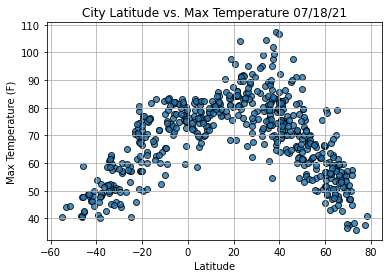

In [67]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

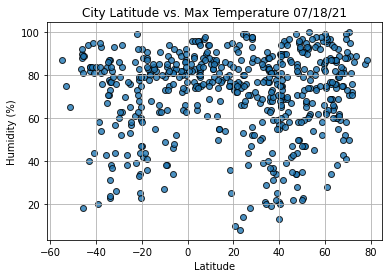

In [68]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

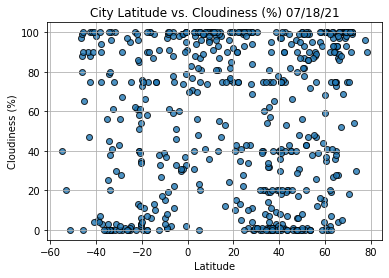

In [69]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

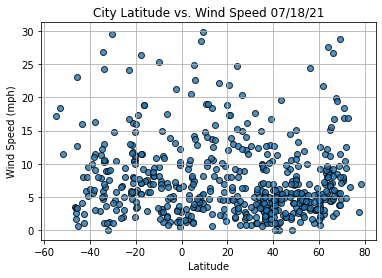

In [70]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [72]:
index13 = city_data_df.loc[13]
index13

City                       Bratsk
Country                        RU
Date          2021-07-18 23:04:53
Lat                       56.1325
Lng                      101.6142
Max Temp                    57.69
Humidity                       74
Cloudiness                     47
Wind Speed                   3.06
Name: 13, dtype: object

In [73]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
548     True
549     True
550    False
551     True
552    False
Name: Lat, Length: 553, dtype: bool

In [74]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Shingu,JP,2021-07-18 23:04:51,33.7333,135.9833,83.39,78,20,3.71
4,Dikson,RU,2021-07-18 23:04:51,73.5069,80.5464,35.83,89,30,6.55
6,Gudur,IN,2021-07-18 23:04:52,14.1333,79.8500,81.23,68,100,8.12
8,Albany,US,2021-07-18 23:01:59,42.6001,-73.9662,70.30,95,100,5.37
9,Pangody,RU,2021-07-18 23:04:53,65.8500,74.4859,54.07,55,28,7.09
...,...,...,...,...,...,...,...,...,...
546,Great Neck,US,2021-07-18 23:07:06,40.8007,-73.7285,81.88,66,75,1.01
547,Robinson,US,2021-07-18 23:08:11,31.4677,-97.1147,94.39,50,20,3.00
548,Harrison,US,2021-07-18 23:08:12,30.4091,-89.0436,86.02,77,1,3.44
549,Ploemeur,FR,2021-07-18 23:08:12,47.7333,-3.4333,71.94,82,0,6.91


In [75]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

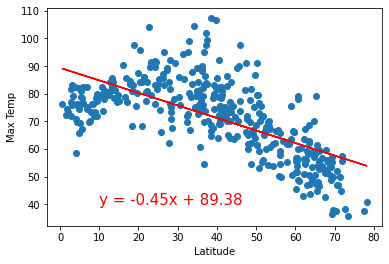

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

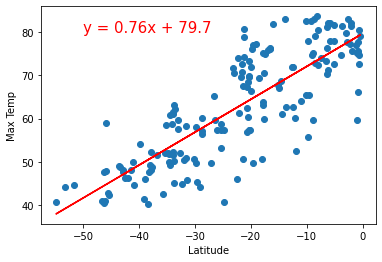

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

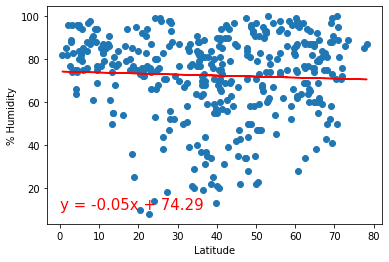

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(0,10))

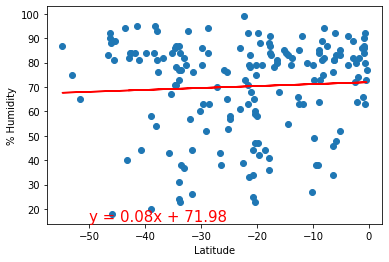

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

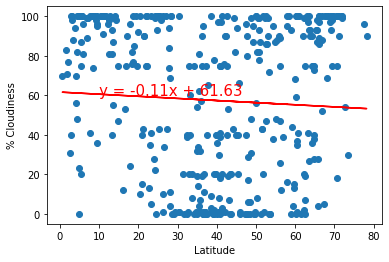

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

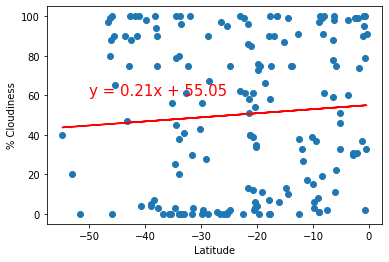

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

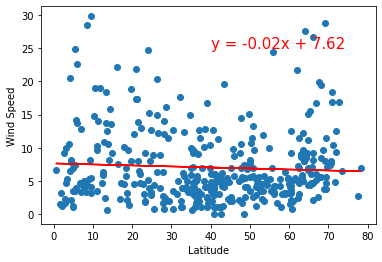

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))


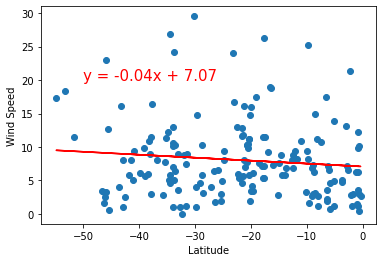

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))